In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
search = pd.read_csv(r"C:\Users\SRIJA DAS\Downloads\NY\search_data.csv")
quote = pd.read_csv(r"C:\Users\SRIJA DAS\Downloads\NY\quote_data.csv")
booking = pd.read_csv(r"C:\Users\SRIJA DAS\Downloads\NY\booking_data.csv")
cancel = pd.read_csv(r"C:\Users\SRIJA DAS\Downloads\NY\booking_cancellation_data.csv")


In [27]:
for df in [search, quote, booking, cancel]:
    print(df.shape)
    print(df.isnull().sum())


(2296376, 4)
search_request_id            0
search_request_created_at    0
estimated_distance           0
estimated_duration           0
dtype: int64
(1480947, 8)
quote_id              0
search_request_id     0
driver_id             0
quote_created_at      0
distance_to_pickup    0
duration_to_pickup    0
driver_rating         0
estimated_fare        0
dtype: int64
(1471458, 5)
booking_id             0
status                 0
booking_created_at     0
rider_id              77
quote_id               0
dtype: int64
(477921, 4)
booking_id       0
source           0
cancelled_at     0
reason_code     58
dtype: int64


In [33]:
search.head(20)

,search_request_id,search_request_created_at,estimated_distance,estimated_duration
0,f6ee886c-0363-4fee-9dcb-649e496bbcde,2025-01-05 00:00:01,16803,1929
1,32de8972-992e-43f4-a619-3207c4ac2847,2025-01-05 00:00:02,43353,3059
2,b82fb857-e164-4915-af21-2ebf5f27a31b,2025-01-05 00:00:02,20568,2045
3,6aca8150-bc96-46e2-8302-2ed374f1ee5a,2025-01-05 00:00:04,12551,1410
4,723b361b-fdac-40f3-a0f2-426c487e6fde,2025-01-05 00:00:04,3875,539
5,24acf801-b9bd-4ef5-9f69-beb0020ea61d,2025-01-05 00:00:05,2887,419
6,4d61aeb6-38ce-4572-8b0f-a6f2b35d8fb9,2025-01-05 00:00:05,20568,2050
7,ad146584-ceba-41e6-a9f7-278d451bb2ed,2025-01-05 00:00:07,11311,1291
8,3fc3251a-26ec-4790-846d-08431375b759,2025-01-05 00:00:12,10734,1111
9,4fb79b73-68d1-41cd-be50-3e3ced8c81c4,2025-01-05 00:00:12,11311,1291


In [39]:
search['search_request_created_at']

0          2025-01-05 00:00:01
1          2025-01-05 00:00:02
2          2025-01-05 00:00:02
3          2025-01-05 00:00:04
4          2025-01-05 00:00:04
                  ...         
2296371    2025-01-08 12:18:56
2296372    2025-01-08 12:18:56
2296373    2025-01-08 12:18:57
2296374    2025-01-08 12:18:57
2296375    2025-01-08 12:18:57
Name: search_request_created_at, Length: 2296376, dtype: object

In [29]:
date_cols = ['created_at']
for df in [search, quote, booking, cancel]:
    if 'created_at' in df.columns:
        df['created_at'] = pd.to_datetime(df['created_at'])


In [31]:
search.drop_duplicates(inplace=True)
quote.drop_duplicates(inplace=True)
booking.drop_duplicates(inplace=True)
cancel.drop_duplicates(inplace=True)


In [43]:
total_searches = search['search_request_id'].nunique()
quoted_searches = quote['search_request_id'].nunique()
booked_searches = booking['search_request_id'].nunique()


KeyError: 'search_request_id'

In [47]:
search_quote = search.merge(quote, on='search_request_id', how='left')

In [53]:
search_quote.head()

,search_request_id,search_request_created_at,estimated_distance,estimated_duration,quote_id,driver_id,quote_created_at,distance_to_pickup,duration_to_pickup,driver_rating,estimated_fare
0,f6ee886c-0363-4fee-9dcb-649e496bbcde,2025-01-05 00:00:01,16803,1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32de8972-992e-43f4-a619-3207c4ac2847,2025-01-05 00:00:02,43353,3059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b82fb857-e164-4915-af21-2ebf5f27a31b,2025-01-05 00:00:02,20568,2045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6aca8150-bc96-46e2-8302-2ed374f1ee5a,2025-01-05 00:00:04,12551,1410,5e7db326-1395-4a7c-9bf3-f6ccef755218,f3222af3-3a80-4e5a-9b1d-a03eabb25e21,2025-01-05 00:00:59,765.0,112.0,4.8,266.0
4,723b361b-fdac-40f3-a0f2-426c487e6fde,2025-01-05 00:00:04,3875,539,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
full_data = search_quote.merge(booking, on='quote_id', how='left')

In [57]:
full_data.head()

,search_request_id,search_request_created_at,estimated_distance,estimated_duration,quote_id,driver_id,quote_created_at,distance_to_pickup,duration_to_pickup,driver_rating,estimated_fare,booking_id,status,booking_created_at,rider_id
0,f6ee886c-0363-4fee-9dcb-649e496bbcde,2025-01-05 00:00:01,16803,1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32de8972-992e-43f4-a619-3207c4ac2847,2025-01-05 00:00:02,43353,3059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b82fb857-e164-4915-af21-2ebf5f27a31b,2025-01-05 00:00:02,20568,2045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6aca8150-bc96-46e2-8302-2ed374f1ee5a,2025-01-05 00:00:04,12551,1410,5e7db326-1395-4a7c-9bf3-f6ccef755218,f3222af3-3a80-4e5a-9b1d-a03eabb25e21,2025-01-05 00:00:59,765.0,112.0,4.8,266.0,7a243ba1-c4cb-4f31-a1da-40154d7236b1,CANCELLED,2025-01-05 00:00:59,30f443f6-e33e-4e12-a48d-47c9bf883597
4,723b361b-fdac-40f3-a0f2-426c487e6fde,2025-01-05 00:00:04,3875,539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
total_searches = search['search_request_id'].nunique()
quoted_searches = quote['search_request_id'].nunique()
booked_searches = booking['quote_id'].nunique()


In [63]:
funnel_df = pd.DataFrame({
    'Stage': ['Searches', 'Quotes', 'Bookings'],
    'Count': [total_searches, quoted_searches, booked_searches]
})

funnel_df

,Stage,Count
0,Searches,2296376
1,Quotes,1279368
2,Bookings,1466749


In [75]:
funnel_df['Conversion_%'] = funnel_df['Count'] / total_searches * 100
funnel_df

,Stage,Count,Conversion_%
0,Searches,2296376,100.000000
1,Quotes,1279368,55.712479
2,Bookings,1466749,63.872336


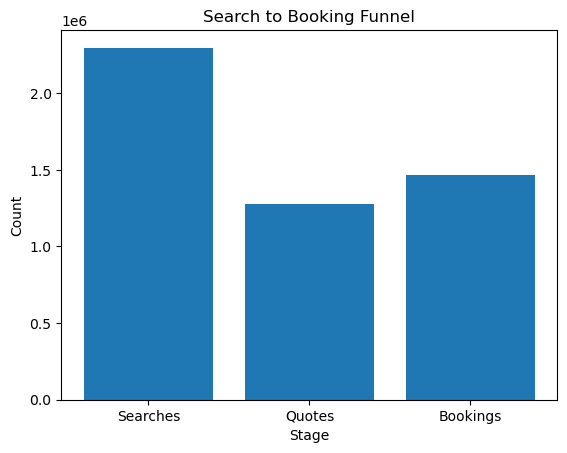

In [67]:
plt.figure()
plt.bar(funnel_df['Stage'], funnel_df['Count'])
plt.title('Search to Booking Funnel')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()


In [79]:
full_data['search_request_created_at'] = pd.to_datetime(full_data['search_request_created_at'])
full_data['hour'] = full_data['search_request_created_at'].dt.hour

In [81]:
def time_bucket(hour):
    if 6 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 17:
        return 'Day'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

full_data['time_of_day'] = full_data['hour'].apply(time_bucket)

In [83]:
full_data.head()

,search_request_id,search_request_created_at,estimated_distance,estimated_duration,quote_id,driver_id,quote_created_at,distance_to_pickup,duration_to_pickup,driver_rating,estimated_fare,booking_id,status,booking_created_at,rider_id,hour,time_of_day
0,f6ee886c-0363-4fee-9dcb-649e496bbcde,2025-01-05 00:00:01,16803,1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Night
1,32de8972-992e-43f4-a619-3207c4ac2847,2025-01-05 00:00:02,43353,3059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Night
2,b82fb857-e164-4915-af21-2ebf5f27a31b,2025-01-05 00:00:02,20568,2045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Night
3,6aca8150-bc96-46e2-8302-2ed374f1ee5a,2025-01-05 00:00:04,12551,1410,5e7db326-1395-4a7c-9bf3-f6ccef755218,f3222af3-3a80-4e5a-9b1d-a03eabb25e21,2025-01-05 00:00:59,765.0,112.0,4.8,266.0,7a243ba1-c4cb-4f31-a1da-40154d7236b1,CANCELLED,2025-01-05 00:00:59,30f443f6-e33e-4e12-a48d-47c9bf883597,0,Night
4,723b361b-fdac-40f3-a0f2-426c487e6fde,2025-01-05 00:00:04,3875,539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Night


In [85]:
full_data['estimated_distance'] = full_data['estimated_distance']


In [87]:
def trip_length(dist):
    if dist < 5:
        return 'Short'
    elif dist <= 15:
        return 'Medium'
    else:
        return 'Long'

full_data['trip_length'] = full_data['estimated_distance'].apply(trip_length)


In [89]:
full_data.head()

,search_request_id,search_request_created_at,estimated_distance,estimated_duration,quote_id,driver_id,quote_created_at,distance_to_pickup,duration_to_pickup,driver_rating,estimated_fare,booking_id,status,booking_created_at,rider_id,hour,time_of_day,trip_length
0,f6ee886c-0363-4fee-9dcb-649e496bbcde,2025-01-05 00:00:01,16803,1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Night,Long
1,32de8972-992e-43f4-a619-3207c4ac2847,2025-01-05 00:00:02,43353,3059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Night,Long
2,b82fb857-e164-4915-af21-2ebf5f27a31b,2025-01-05 00:00:02,20568,2045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Night,Long
3,6aca8150-bc96-46e2-8302-2ed374f1ee5a,2025-01-05 00:00:04,12551,1410,5e7db326-1395-4a7c-9bf3-f6ccef755218,f3222af3-3a80-4e5a-9b1d-a03eabb25e21,2025-01-05 00:00:59,765.0,112.0,4.8,266.0,7a243ba1-c4cb-4f31-a1da-40154d7236b1,CANCELLED,2025-01-05 00:00:59,30f443f6-e33e-4e12-a48d-47c9bf883597,0,Night,Long
4,723b361b-fdac-40f3-a0f2-426c487e6fde,2025-01-05 00:00:04,3875,539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Night,Long


In [93]:
funnel_df = full_data.groupby(['time_of_day', 'trip_length']).agg(
    searches=('search_request_id', 'nunique'),
    quotes=('quote_id', 'nunique'),
    bookings=('booking_id', 'nunique'),
    completed=('status', lambda x: (x == 'COMPLETED').sum())
).reset_index()


In [95]:
funnel_df

,time_of_day,trip_length,searches,quotes,bookings,completed
0,Day,Long,1020379,669767,661747,432292
1,Day,Medium,1658,88,88,17
2,Day,Short,7310,519,512,104
3,Evening,Long,77774,44775,44295,28231
4,Evening,Medium,112,2,2,1
5,Evening,Short,543,44,43,10
6,Morning,Long,471819,324207,320549,232306
7,Morning,Medium,755,38,38,14
8,Morning,Short,3799,305,301,77
9,Night,Long,706914,440847,436274,295093


In [99]:
funnel_df['search_to_quote'] = funnel_df['quotes'] / funnel_df['searches']
funnel_df['quote_to_booking'] = funnel_df['bookings'] / funnel_df['quotes']
funnel_df['booking_to_completed'] = funnel_df['completed'] / funnel_df['bookings']
funnel_df.fillna(0, inplace=True)

In [101]:
funnel_df['max_drop_stage'] = funnel_df[['search_to_quote', 'quote_to_booking', 'booking_to_completed']].idxmin(axis=1)

In [105]:
funnel_df.sort_values(by='search_to_quote')

,time_of_day,trip_length,searches,quotes,bookings,completed,search_to_quote,quote_to_booking,booking_to_completed,max_drop_stage
4,Evening,Medium,112,2,2,1,0.017857,1.000000,0.500000,search_to_quote
10,Night,Medium,997,31,31,9,0.031093,1.000000,0.290323,search_to_quote
7,Morning,Medium,755,38,38,14,0.050331,1.000000,0.368421,search_to_quote
1,Day,Medium,1658,88,88,17,0.053076,1.000000,0.193182,search_to_quote
11,Night,Short,4316,273,270,62,0.063253,0.989011,0.229630,search_to_quote
2,Day,Short,7310,519,512,104,0.070999,0.986513,0.203125,search_to_quote
8,Morning,Short,3799,305,301,77,0.080284,0.986885,0.255814,search_to_quote
5,Evening,Short,543,44,43,10,0.081031,0.977273,0.232558,search_to_quote
3,Evening,Long,77774,44775,44295,28231,0.575707,0.989280,0.637341,search_to_quote
9,Night,Long,706914,440847,436274,295093,0.623622,0.989627,0.676394,search_to_quote


In [107]:
full_data[(full_data['time_of_day']=='Night') & (full_data['trip_length']=='Long')]['quote_id'].nunique()

440847

In [111]:
booking['status'].value_counts()

status
COMPLETED        989084
CANCELLED        477665
TRIP_ASSIGNED      4694
NEW                  15
Name: count, dtype: int64

In [113]:
cancelled_bookings = booking[booking['status'] == 'CANCELLED']

In [115]:
overall_cancellation_rate = (cancelled_bookings['booking_id'].nunique()/ booking['booking_id'].nunique()) * 100
overall_cancellation_rate

32.5662400315255

In [127]:
booking_cancel = full_data.merge(cancel, on='booking_id', how='left')
booking_cancel.head()

,search_request_id,search_request_created_at,estimated_distance,estimated_duration,quote_id,driver_id,quote_created_at,distance_to_pickup,duration_to_pickup,driver_rating,...,booking_id,status,booking_created_at,rider_id,hour,time_of_day,trip_length,source,cancelled_at,reason_code
0,f6ee886c-0363-4fee-9dcb-649e496bbcde,2025-01-05 00:00:01,16803,1929,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Night,Long,NaN,NaN,NaN
1,32de8972-992e-43f4-a619-3207c4ac2847,2025-01-05 00:00:02,43353,3059,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Night,Long,NaN,NaN,NaN
2,b82fb857-e164-4915-af21-2ebf5f27a31b,2025-01-05 00:00:02,20568,2045,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Night,Long,NaN,NaN,NaN
3,6aca8150-bc96-46e2-8302-2ed374f1ee5a,2025-01-05 00:00:04,12551,1410,5e7db326-1395-4a7c-9bf3-f6ccef755218,f3222af3-3a80-4e5a-9b1d-a03eabb25e21,2025-01-05 00:00:59,765.0,112.0,4.8,...,7a243ba1-c4cb-4f31-a1da-40154d7236b1,CANCELLED,2025-01-05 00:00:59,30f443f6-e33e-4e12-a48d-47c9bf883597,0,Night,Long,ByDriver,2025-01-05 00:09:00,PICKUP_TOO_FAR
4,723b361b-fdac-40f3-a0f2-426c487e6fde,2025-01-05 00:00:04,3875,539,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Night,Long,NaN,NaN,NaN


In [121]:
cancel_by_type = booking_cancel['reason_code'].value_counts(normalize=True) * 100
cancel_by_type

reason_code
TRAFFIC_JAM                      16.616427
PICKUP_TOO_FAR                   14.119768
WAIT_TIME_TOO_LONG               11.951326
OTHER                            11.237995
DRIVER_NOT_MOVING                 9.107207
                                   ...    
Jsusjs                            0.000209
ntg                               0.000209
driver is asking extra money      0.000209
wait time is more                 0.000209
got auto                          0.000209
Name: proportion, Length: 240, dtype: float64

In [129]:
def pickup_bucket(dist):
    if dist < 2:
        return 'Near (<2km)'
    elif dist <= 5:
        return 'Medium (2–5km)'
    else:
        return 'Far (>5km)'
booking_cancel['pickup_bucket'] = booking_cancel['distance_to_pickup'].apply(pickup_bucket)

In [131]:
def trip_bucket(dist):
    if dist < 5:
        return 'Short'
    elif dist <= 15:
        return 'Medium'
    else:
        return 'Long'

booking_cancel['trip_bucket'] = booking_cancel['estimated_distance'].apply(trip_bucket)

In [133]:
cancel_distance_analysis = booking_cancel.groupby(['pickup_bucket', 'trip_bucket'])['booking_id'].nunique().reset_index(name='cancelled_bookings')
cancel_distance_analysis

,pickup_bucket,trip_bucket,cancelled_bookings
0,Far (>5km),Long,1458012
1,Far (>5km),Medium,158
2,Far (>5km),Short,1116
3,Medium (2–5km),Long,3188
4,Medium (2–5km),Medium,1
5,Medium (2–5km),Short,2
6,Near (<2km),Long,1665
7,Near (<2km),Short,8


In [141]:
top_driver_reasons = (booking_cancel[booking_cancel['source'] == 'ByDriver']['reason_code'].value_counts().head(3))
top_driver_reasons

reason_code
TRAFFIC_JAM       79276
PICKUP_TOO_FAR    67373
VEHICLE_ISSUE     34761
Name: count, dtype: int64

In [143]:
booking_cancel['cancelled_at'] = pd.to_datetime(booking_cancel['cancelled_at'])
booking_cancel['hour'] = booking_cancel['cancelled_at'].dt.hour
booking_cancel['time_of_day'] = booking_cancel['hour'].apply(time_bucket)

In [145]:
driver_cancel_trends = booking_cancel[booking_cancel['source'] == 'ByDriver'].groupby(['time_of_day', 'trip_bucket']
)['booking_id'].nunique().reset_index(name='driver_cancellations')

driver_cancel_trends

,time_of_day,trip_bucket,driver_cancellations
0,Day,Long,125945
1,Day,Medium,26
2,Day,Short,211
3,Evening,Long,7750
4,Evening,Medium,1
5,Evening,Short,24
6,Morning,Long,46885
7,Morning,Medium,7
8,Morning,Short,127
9,Night,Long,75063


In [153]:
booking_cancel['driver_rating'].unique()

array([nan, 4.8, 4.7, 4.5, 4.6, 4.9, 4.3, 0. , 4.4, 5. , 3.5, 4.1, 4.2,
       3.7, 4. , 1. , 3.9, 3.8, 3.2, 3.4, 3. , 2.5, 2.8, 3.3, 2.9, 3.6,
       2. , 2.3, 1.5, 1.2, 2.7, 2.6, 3.1, 2.4])

In [155]:
booking_cancel['driver_rating'] = pd.to_numeric(
    booking_cancel['driver_rating'],
    errors='coerce'
)

In [157]:
booking_cancel['driver_rating'].dtype
booking_cancel['driver_rating'].isnull().sum()

1018419

In [159]:
rating_vs_cancel = booking_cancel.groupby(
    pd.cut(
        booking_cancel['driver_rating'],
        bins=[0,1,2,3,4,5]
    )
)['booking_id'].nunique()

rating_vs_cancel

C:\Users\SRIJA DAS\AppData\Local\Temp\ipykernel_20388\3609139001.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_vs_cancel = booking_cancel.groupby(


driver_rating
(0, 1]        177
(1, 2]         72
(2, 3]        527
(3, 4]       4294
(4, 5]    1450824
Name: booking_id, dtype: int64

In [161]:
funnel_df[['search_to_quote', 'quote_to_booking', 'booking_to_completed']].mean()

search_to_quote         0.249232
quote_to_booking        0.991278
booking_to_completed    0.413730
dtype: float64

In [163]:
driver_features = booking_cancel.groupby('driver_id').agg(
    total_quotes=('quote_id', 'nunique'),
    total_bookings=('booking_id', 'nunique'),
    total_cancellations=('status', lambda x: (x == 'CANCELLED').sum()),
    avg_rating=('driver_rating', 'mean')
).fillna(0)

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = driver_features[['total_quotes', 'total_bookings', 'total_cancellations', 'avg_rating']]
X_scaled = StandardScaler().fit_transform(X)

In [167]:
kmeans = KMeans(n_clusters=3, random_state=42)
driver_features['cluster'] = kmeans.fit_predict(X_scaled)

In [169]:
driver_features.groupby('cluster').mean()

,total_quotes,total_bookings,total_cancellations,avg_rating
cluster,,,,
0,8.889882,8.784970,2.949903,4.655123
1,51.245371,50.693322,15.862186,4.692598
2,3.450980,3.409586,1.491830,0.244277


In [177]:
full_data['week'] = full_data['search_request_created_at'].dt.to_period('W').astype(str)

In [178]:
weekly_funnel = full_data.groupby('week').agg(
    searches=('search_request_id', 'nunique'),
    bookings=('booking_id', 'nunique')
).reset_index()

weekly_funnel['conversion_rate'] = weekly_funnel['bookings'] / weekly_funnel['searches']

In [183]:
booking_cancel['booking_created_at'] = pd.to_datetime(booking_cancel['booking_created_at'])

In [185]:
booking_cancel['week'] = booking_cancel['booking_created_at'].dt.to_period('W').astype(str)

In [187]:
weekly_cancellations = (
    booking_cancel
    .groupby('week')['booking_id']
    .nunique()
    .reset_index()
)
weekly_cancellations

,week,booking_id
0,2024-12-30/2025-01-05,173088
1,2025-01-06/2025-01-12,1291062
2,NaT,0


In [191]:
powerbi_funnel = pd.DataFrame({
    'Stage': ['Search', 'Quote', 'Booking', 'Completed'],
    'Count': [
        full_data['search_request_id'].nunique(),
        full_data['quote_id'].nunique(),
        full_data['booking_id'].nunique(),
        (full_data['status'] == 'COMPLETED').sum()
    ]
})

powerbi_funnel.to_csv("powerbi_overall_funnel.csv", index=False)


In [193]:
powerbi_segment = funnel_df[['time_of_day','trip_length','searches','quotes','bookings','completed']]
powerbi_segment.to_csv("powerbi_segment_funnel.csv", index=False)

In [195]:
funnel_long = []

for _, row in funnel_df.iterrows():
    funnel_long.extend([
        {'time_of_day': row['time_of_day'], 'trip_length': row['trip_length'], 'Stage': 'Search', 'Count': row['searches']},
        {'time_of_day': row['time_of_day'], 'trip_length': row['trip_length'], 'Stage': 'Quote', 'Count': row['quotes']},
        {'time_of_day': row['time_of_day'], 'trip_length': row['trip_length'], 'Stage': 'Booking', 'Count': row['bookings']},
        {'time_of_day': row['time_of_day'], 'trip_length': row['trip_length'], 'Stage': 'Completed', 'Count': row['completed']}
    ])

funnel_long_df = pd.DataFrame(funnel_long)
funnel_long_df.to_csv("powerbi_funnel_long.csv", index=False)
